In [8]:
# 1.对目标函数进行优化
import numpy as np
from scipy.optimize import minimize

In [9]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2)

In [10]:
def rosen_der(x):
    #jacbion矩阵（导数矩阵）
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [11]:
def rosen_hess(x):
    #hessian矩阵
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [23]:
x0 = np.array([1.3, 1.5, 0.8, 1.9, 1.2])

In [24]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der,hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 53
         Hessian evaluations: 23


array([1.        , 1.        , 1.        , 1.        , 0.99999999])

In [14]:
#2.常微分方程求解
from sympy import *

In [15]:
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
print(dsolve(eq, f(x)))

Eq(f(x), -C1/(C1 - exp(x)))


In [16]:
C1 = symbols('C1')
eqr = -C1/(C1 - exp(x))
eqr1 = eqr.subs(x, 0)
print(solveset(eqr1 - 1, C1))
eqr2 = eqr.subs(C1, 1/2)

{1/2}


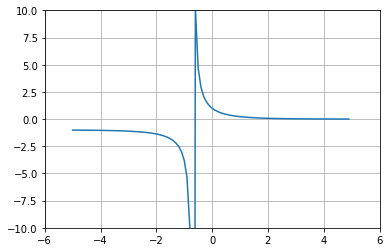

In [22]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
x_1 = np.arange(-5, 5, 0.1)
y_1 = [-0.5/(0.5 - exp(x)) for x in x_1]
plt.plot(x_1, y_1)
plt.axis([-6,6,-10,10])
plt.grid()
plt.show()